In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
path = "results/"
results = {}
# go through each folder and load all results '.npy' files
for folder in os.listdir(path):
    folderName = folder.replace("_", " ")
    results[folderName] = {}
    for file in os.listdir(path + folder):
        results[folderName][file[:-4]] = np.load(path + folder + "/" + file)

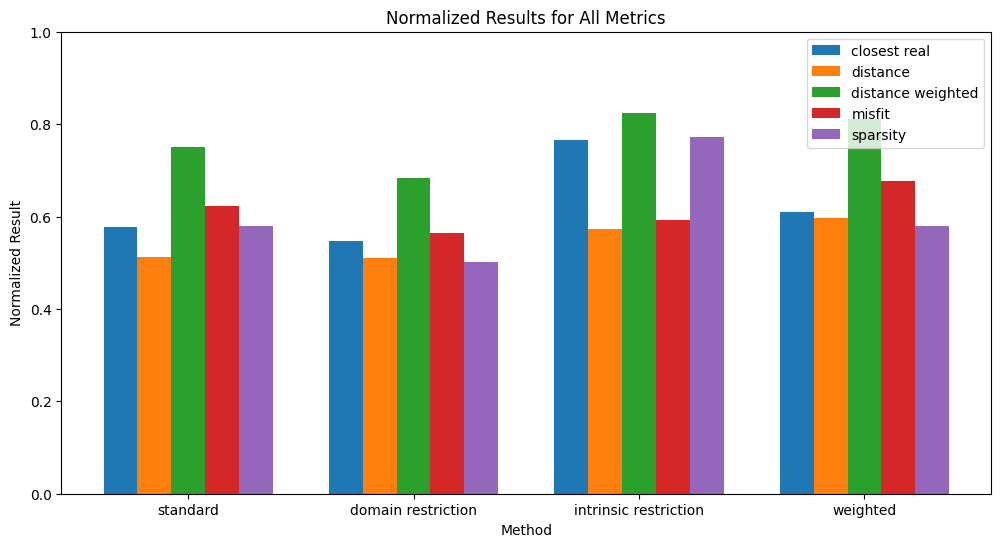

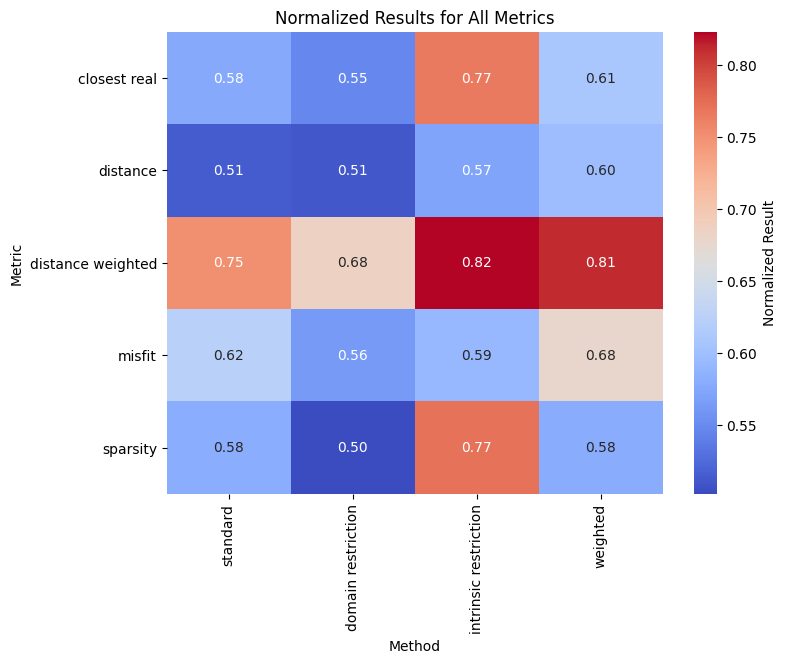

In [3]:
def normalize_data(data):
    min_val = np.min(data)
    max_val = np.max(data)
    return (data - min_val) / (max_val - min_val)

def analyse_all_metrics(results):
    custom_order = ["standard", "domain restriction", "intrinsic restriction", "weighted"]

    # Sort the dictionary keys based on the custom order
    sorted_keys = sorted(next(iter(results.values())).keys(), key=lambda x: custom_order.index(x))

    num_metrics = len(results)
    num_methods = len(sorted_keys)

    means = np.zeros((num_metrics, num_methods))

    metrics_to_maximize = ['sparsity']  # Add the metrics to be maximized here

    for i, (metric_name, data) in enumerate(results.items()):
        for j, key in enumerate(sorted_keys):
            normalized_data = normalize_data(np.array(data[key]))
            
            # If the metric is not in the list of metrics to maximize, revert the values (1 - value)
            if metric_name not in metrics_to_maximize:
                normalized_data = 1 - normalized_data
            
            means[i, j] = np.mean(normalized_data)

    # Grouped Bar Chart
    plt.figure(figsize=(12, 6))
    bar_width = 0.15
    bar_positions = np.arange(num_methods)

    for i, metric_name in enumerate(results.keys()):
        plt.bar(bar_positions + i * bar_width, means[i], width=bar_width, label=f"{metric_name}")

    plt.title("Normalized Results for All Metrics")
    plt.xlabel("Method")
    plt.ylabel("Normalized Result")
    plt.xticks(bar_positions + bar_width * (num_metrics - 1) / 2, sorted_keys)
    plt.legend()
    plt.ylim(0, 1)
    plt.show()

    # Heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(means, annot=True, fmt=".2f", cmap="coolwarm", yticklabels=list(results.keys()), xticklabels=sorted_keys, cbar_kws={'label': 'Normalized Result'})
    plt.title("Normalized Results for All Metrics")
    plt.ylabel("Metric")
    plt.xlabel("Method")
    plt.show()

analyse_all_metrics(results)

Analysing 4 methods


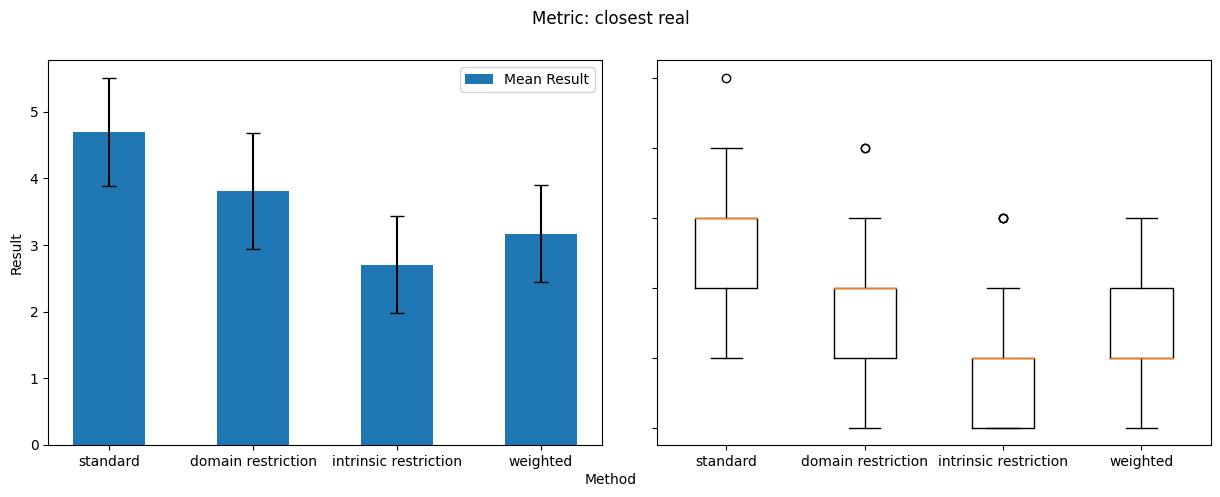

Analysing 4 methods


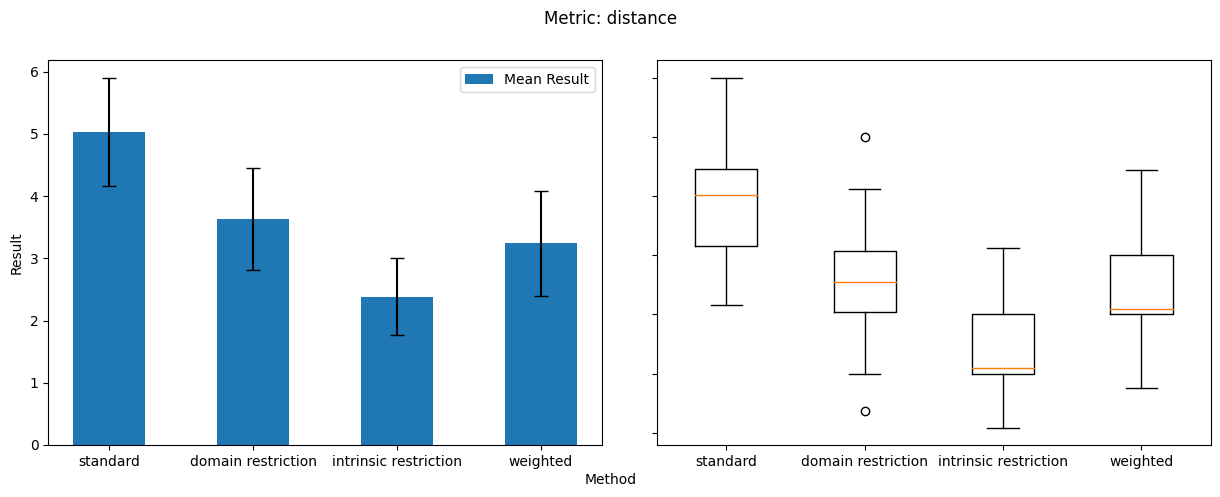

Analysing 4 methods


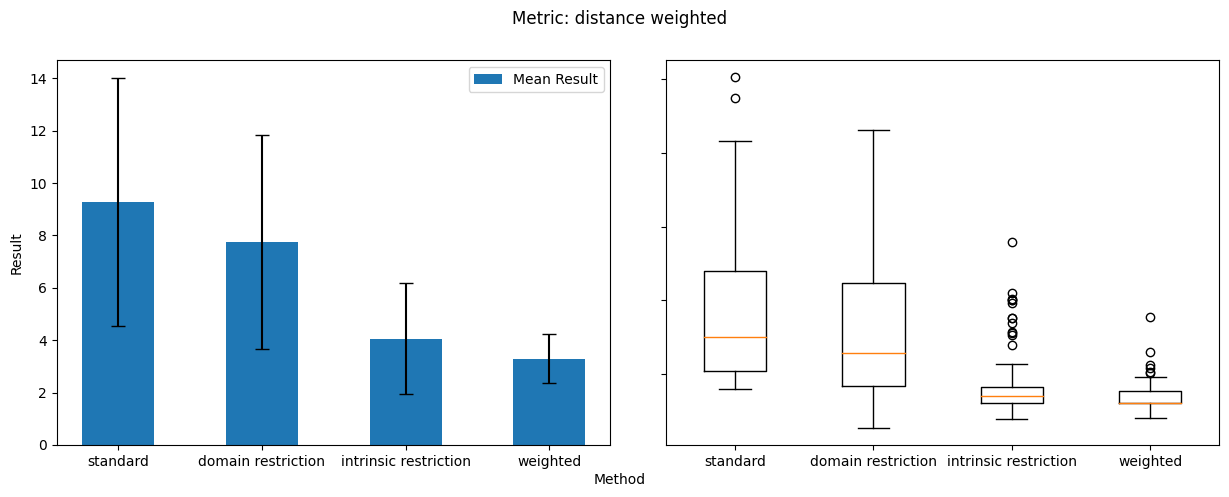

Analysing 4 methods


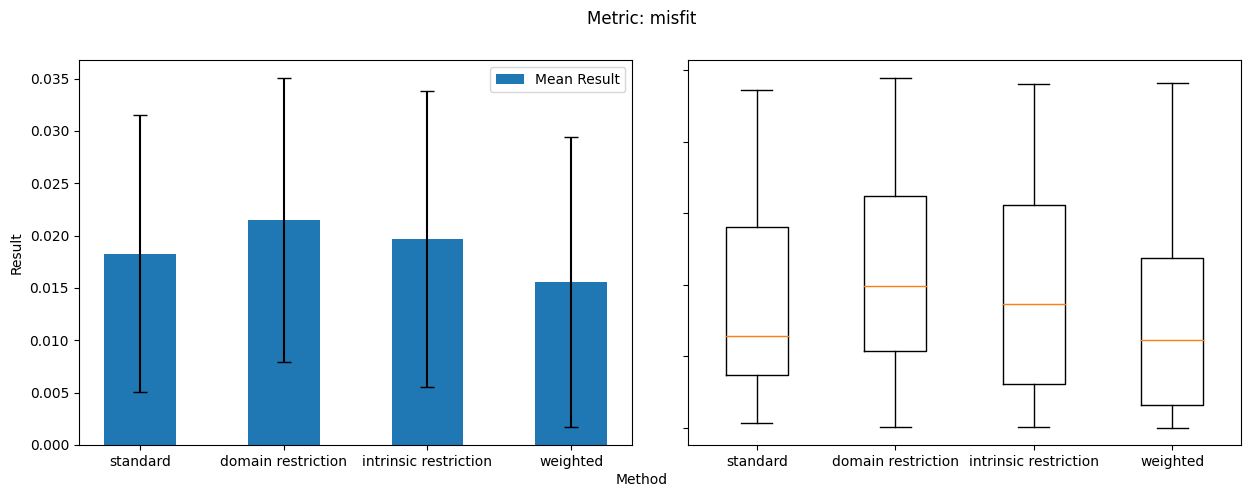

Analysing 4 methods


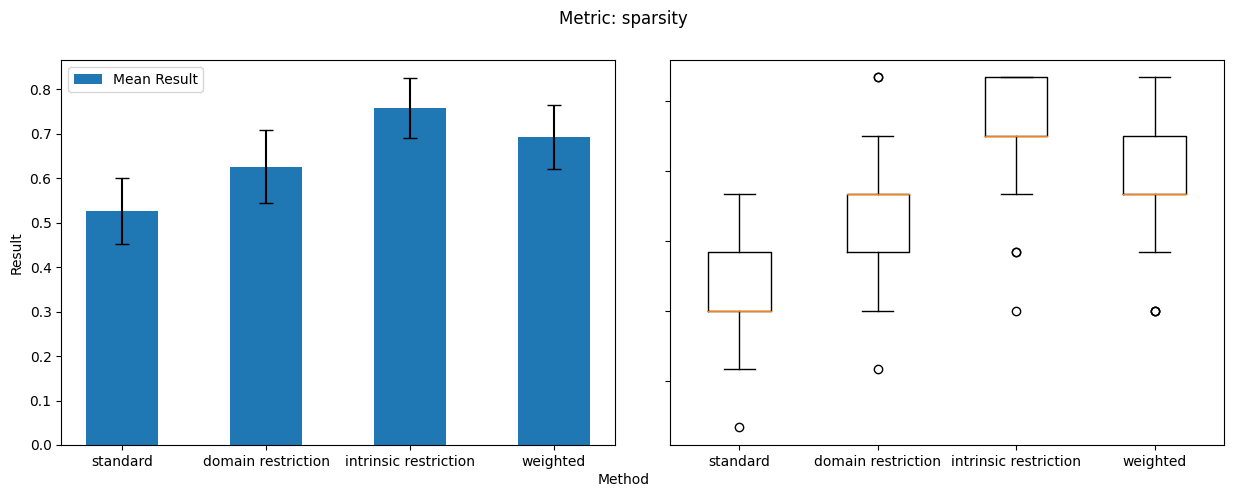

In [4]:
def analyse_metric(data, name):
    name = name.replace("_", " ")
    custom_order = ["standard", "domain restriction", "intrinsic restriction", "weighted"]

    # Sort the dictionary keys based on the custom order
    sorted_keys = sorted(data.keys(), key=lambda x: custom_order.index(x))

    # Count how many methods were used
    methods = len(data)
    print(f"Analysing {methods} methods")

    # Calculate means and standard deviations for each method
    means = [np.mean(data[key]) for key in sorted_keys]
    stds = [np.std(data[key]) for key in sorted_keys]

    # Create subplots for side-by-side graphs
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    # Set shared title and x/y-axis labels
    shared_title = f"Metric: {name}"
    shared_x_label = "Method"
    y_axis_label = "Result"
    
    # Set shared title for the entire figure
    fig.suptitle(shared_title)

    # Grouped Bar Chart
    ax1.set_ylabel(y_axis_label)

    num_metrics = len(sorted_keys)
    bar_width = 0.5
    bar_positions = np.arange(num_metrics)

    ax1.bar(bar_positions, means, width=bar_width, yerr=stds, capsize=5, label="Mean Result")
    ax1.set_xticks(bar_positions)
    ax1.set_xticklabels(sorted_keys)
    ax1.legend()

    # Boxplot
    ax2.boxplot([data[key] for key in sorted_keys], labels=sorted_keys)

    # Remove the y-axis label for the second plot
    ax2.set_yticklabels([])

    # Set shared x-axis label for the entire figure
    fig.text(0.5, 0.04, shared_x_label, ha='center', va='center')

    # Adjust space between subplots
    plt.subplots_adjust(wspace=0.1)

    # Show both plots
    plt.show()


# Analyse each metric
for key, value in results.items():
    analyse_metric(value, key)